In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_dir = "C:/Users/KIIT/Documents/PetImages"
categories = ["Dog","Cat"]

In [3]:
IMG_SIZE=64
training_data = []
def create_training_data():
    
    for category in categories:
        path = os.path.join(data_dir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
random.shuffle(training_data)

In [4]:
x = []
y = []
for features, labels in training_data:
    x.append(features)
    y.append(labels)

X = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = np.array(y).reshape(-1,1)
X = X/255.0
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.1)


In [5]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(X.shape[1:]),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
early_stop = EarlyStopping(monitor='val_loss',patience = 3,restore_best_weights=True)
model.fit(x=x_train,y=y_train,batch_size=32,epochs=40,validation_split=0.15,callbacks=[early_stop])

Epoch 1/40
597/597 [==============================] - 114s 191ms/step - loss: 0.6383 - accuracy: 0.6242 - val_loss: 0.5531 - val_accuracy: 0.7176
Epoch 2/40
597/597 [==============================] - 106s 177ms/step - loss: 0.5287 - accuracy: 0.7323 - val_loss: 0.4755 - val_accuracy: 0.7728
Epoch 3/40
597/597 [==============================] - 105s 176ms/step - loss: 0.4772 - accuracy: 0.7734 - val_loss: 0.4524 - val_accuracy: 0.7935
Epoch 4/40
597/597 [==============================] - 98s 164ms/step - loss: 0.4414 - accuracy: 0.7954 - val_loss: 0.4369 - val_accuracy: 0.7959
Epoch 5/40
597/597 [==============================] - 91s 152ms/step - loss: 0.4083 - accuracy: 0.8122 - val_loss: 0.4060 - val_accuracy: 0.8128
Epoch 6/40
597/597 [==============================] - 94s 157ms/step - loss: 0.3772 - accuracy: 0.8312 - val_loss: 0.3923 - val_accuracy: 0.8208
Epoch 7/40
597/597 [==============================] - 100s 168ms/step - loss: 0.3515 - accuracy: 0.8435 - val_loss: 0.3736 - va

In [9]:
result=model.evaluate(x_test,y_test,batch_size=32)

79/79 [==============================] - 3s 33ms/step - loss: 0.3733 - accuracy: 0.8446


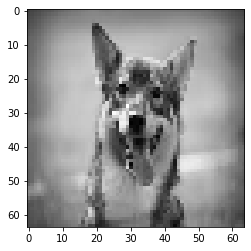

DOG


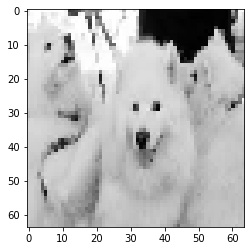

DOG


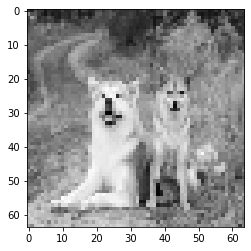

DOG


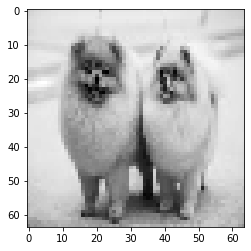

DOG


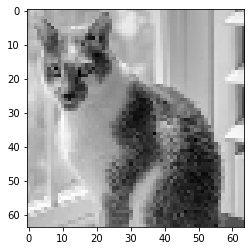

CAT


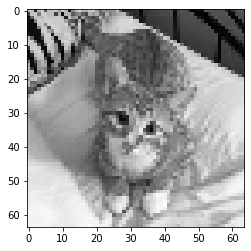

CAT


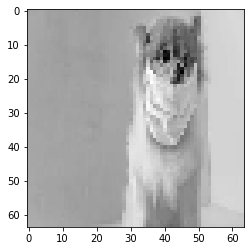

CAT


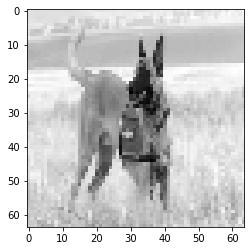

DOG


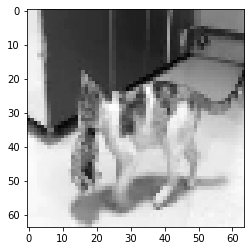

CAT


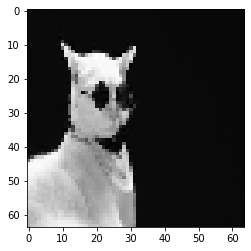

CAT


In [27]:
# TESTING THE MODEL ON OUT OF SAMPLE IMAGES
data="C:/Users/KIIT/Downloads/predict"

for img in os.listdir(data):
        img_array_pred = cv2.imread(os.path.join(data,img),cv2.IMREAD_GRAYSCALE)
        new_array_pred = cv2.resize(img_array_pred, (IMG_SIZE,IMG_SIZE))
        new_array_pred = new_array_pred/255.0
        pred=model.predict(new_array_pred.reshape(1,IMG_SIZE,IMG_SIZE,1))
        plt.imshow(new_array_pred,cmap='gray')
        plt.show()
        if np.round(pred)== 0:
            print("DOG")
        else:
            print("CAT")
        